### Plot the SA fit and spectra together

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
import pandas as pd
%matplotlib inline

In [2]:
# load atmospheric transmission file
hdu = fits.open('/Users/jpw/idl/Spextool/data/atran75000.fits')
tdata = hdu[0].data
atrans = interpolate.interp1d(tdata[0,:], tdata[1,:])

In [104]:
# define the input file parameters
path = '/Volumes/JPW_4TB/iSHELL/191008/reduced/'
source = 'DFTau'
PA1 = 138

# load the spectrum and SA
hdu1 = fits.open(path+'c'+source+'_PA'+str(PA1)+'.fits')
data1 = hdu1[0].data
hd1 = hdu1[0].header
hdu1.close()
SA1 = pd.read_csv(path+source+'_PA'+str(PA1)+'_SA.csv', skipinitialspace=True)

PA2 = PA1 + 180
hdu2 = fits.open(path+'c'+source+'_PA'+str(PA2)+'.fits')
data2 = hdu2[0].data
hd2 = hdu2[0].header
hdu2.close()
SA2 = pd.read_csv(path+source+'_PA'+str(PA2)+'_SA.csv', skipinitialspace=True)


(4.7, 4.8)

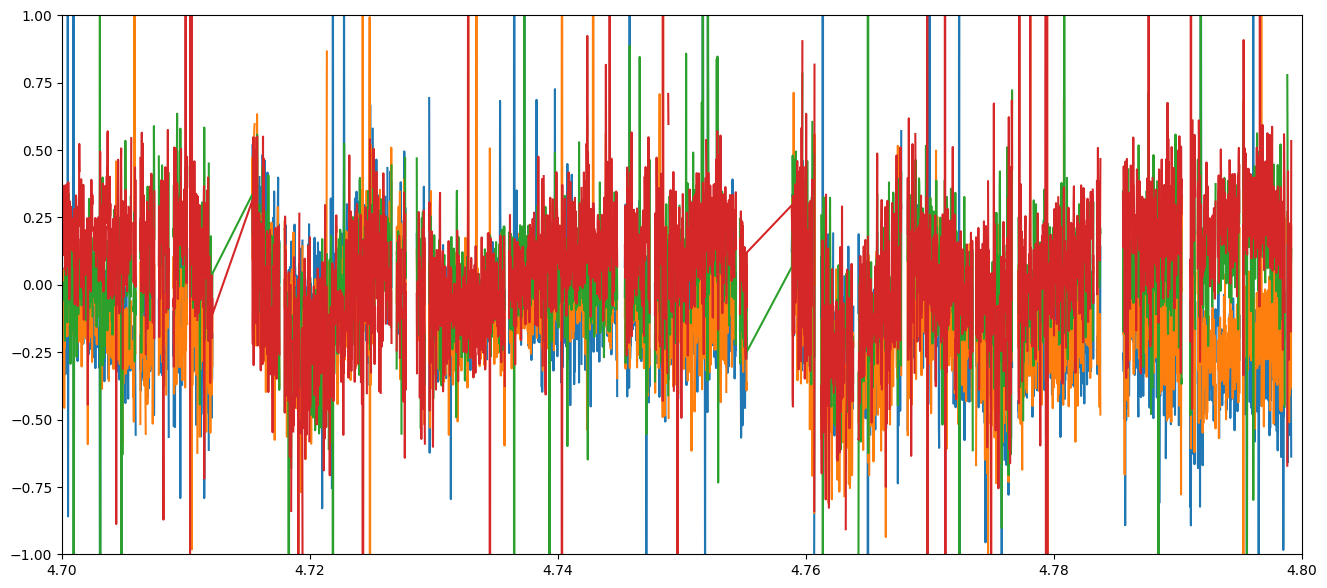

In [105]:
# look at the SA signals for the pos and neg for each parallel and anti-parallel slit
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
ax.plot(SA1['wavelength'], SA1['off_pos'])
ax.plot(SA1['wavelength'], SA1['off_neg'])
ax.plot(SA2['wavelength'], SA2['off_pos'])
ax.plot(SA2['wavelength'], SA2['off_neg'])
#ax.set_ylim(-0.5, 0.5)
ax.set_ylim(-1, 1)
ax.set_xlim(4.7,4.8)

In [106]:
# interpolate the wavelength axis from SA1 to SA2 and create a combined SA that takes out the systematic variation
wl1 = SA1['wavelength']
wl2 = SA2['wavelength']
SA2pos = interpolate.interp1d(wl2, SA2['off_pos'], bounds_error=False)
SA2neg = interpolate.interp1d(wl2, SA2['off_neg'], bounds_error=False)

# following Brittain et al. 2018, average the centroids of the A and B rows and subtract the parallel and anti-parallel
# (and then divide by 2?)
SA_comb = 0.25 * ((SA1['off_pos'] + SA1['off_neg']) - (SA2pos(wl1) + SA2neg(wl1)))

(4.7, 4.8)

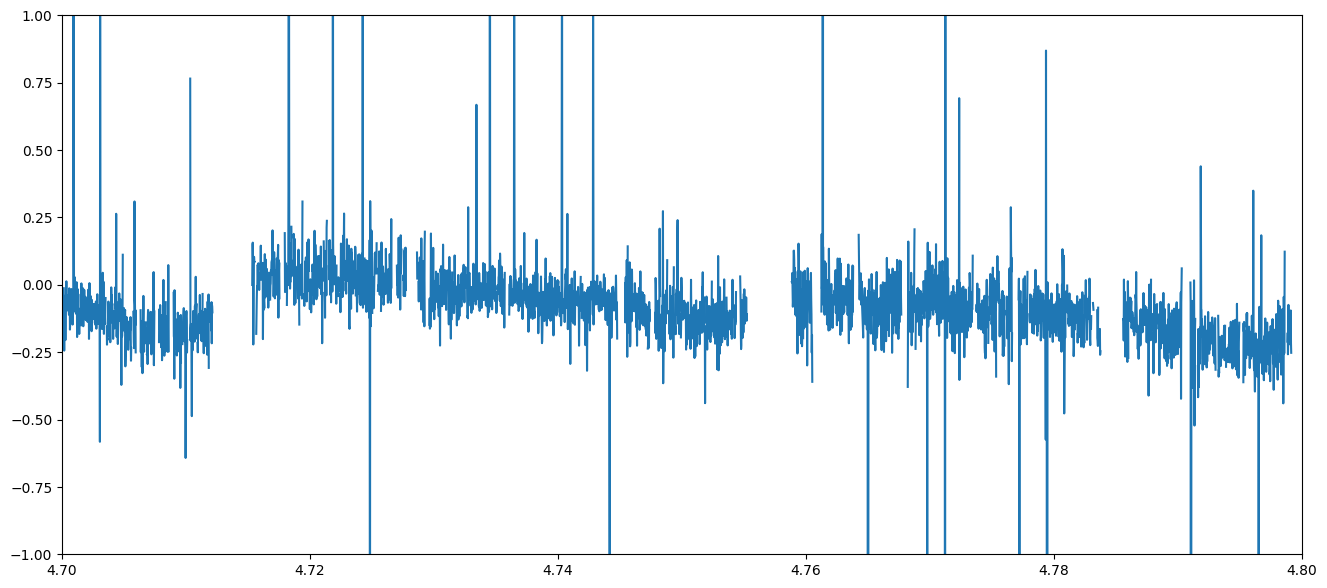

In [107]:
# look at the combined SA signal; scatter is reduced but still some systematics
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
ax.plot(wl1, SA_comb)
#ax.set_ylim(-0.5, 0.5)
ax.set_ylim(-1, 1)
ax.set_xlim(4.7,4.8)

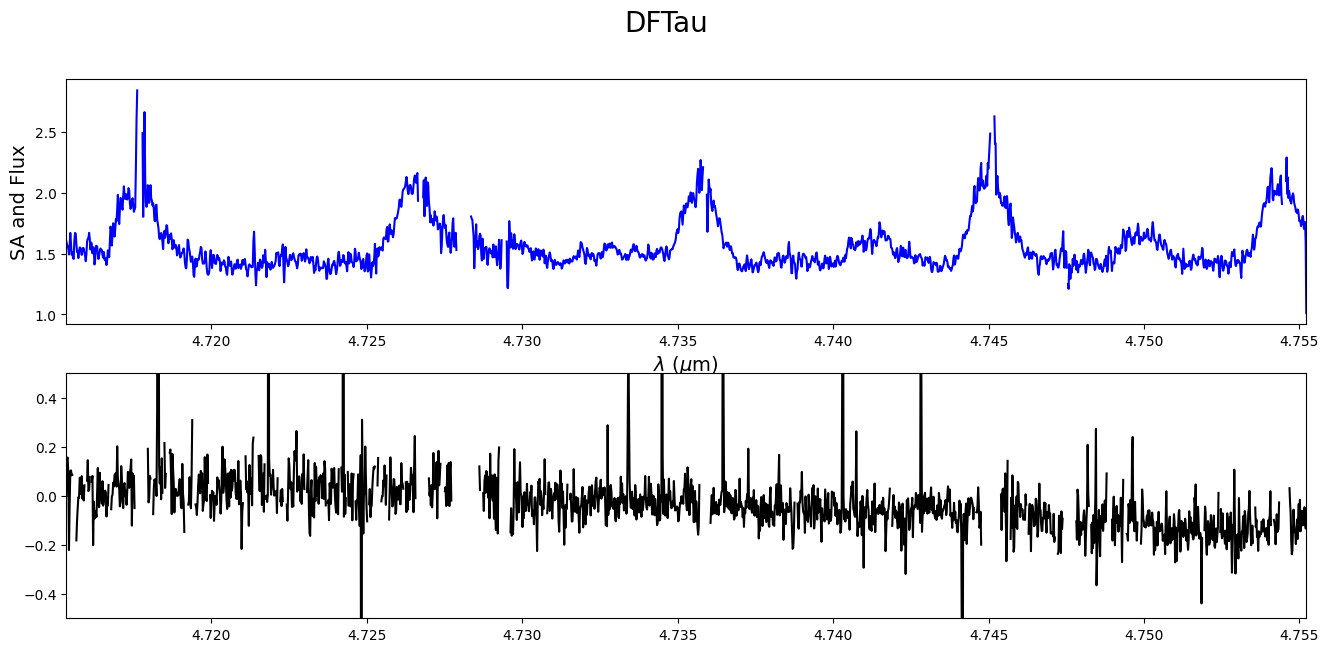

In [108]:
# plot just one order
fig = plt.figure(figsize=(16, 7))
order = 10
wl_spec = data1[order, 0, :]
flux_spec = data1[order, 1, :]
xmin, xmax = np.nanmin(wl_spec), np.nanmax(wl_spec)

ax1 = fig.add_subplot(211)
ax1.plot(wl_spec, flux_spec, color='b')
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
ax1.set_ylabel(r'SA and Flux', fontsize=14)

ax2 = fig.add_subplot(212)
ax2.plot(wl1, SA_comb, color='k')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.5, 0.5)

#axr = ax.twinx()
#axr.plot(wl1, 100*atrans(wl1), '-', color='gray', alpha=0.5)
#axr.set_ylabel(r'Transmission (%)', fontsize=14)
#axr.set_ylim(-400,100)
#axr.set_yticks([-400,-300,-200,-100,0,100])
#axr.set_yticklabels(['','','','','0','100'])

fig.suptitle(source, fontsize=20)
fig.savefig(source+'_SA.pdf', dpi=300)